In [1]:
using Revise

In [2]:
using Profile, PProf

In [3]:
using QARBoM, MLDatasets, DataFrames, CSV, DWave, JuMP

    CondaPkg Found dependencies: /Users/pripper/.julia/packages/DWave/i51VN/CondaPkg.toml
    CondaPkg Found dependencies: /Users/pripper/.julia/packages/PythonCall/S5MOg/CondaPkg.toml
    CondaPkg Found dependencies: /Users/pripper/.julia/packages/DWave/S7WH5/CondaPkg.toml
    CondaPkg Dependencies already up to date


In [4]:
# using Images

In [5]:
trainset = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [6]:
x_train, y_train = trainset[:]

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [13]:
x_bin = [
    vec(round.(Int, x_train[:,:,i][1:200])) for i in 1:60000
    ]

60000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 0, 0, 0, 

In [8]:
MOI = QARBoM.QUBO.ToQUBO.MOI
MOI.supports(::DWave.Neal.Optimizer, ::MOI.ObjectiveSense) = true

In [9]:
28*28 + 500

1284

In [34]:
model = JuMP.direct_model(MOI.Utilities.CachingOptimizer(MOI.Utilities.Model{Float64}(), MOIU.AUTOMATIC))

MOI.Utilities.reset_optimizer(model) # detach optimizer

@variable(model, x[1:3], Bin)
@objective(model, Min, sum(x))

JuMP.set_objective_coefficient(model, x[1], 2.0)

MOI.Utilities.attach_optimizer(DWave.Neal.Optimizer())

optimize!(model)

LoadError: NoOptimizer()

In [61]:
opt.model.form.frame.sense

Min::Sense = 0

In [51]:
opt.attributes.

Dict{Symbol, Any}()

In [11]:
# rbm = QARBoM.RBM(n_vis,n_hid, MOI.Utilities.CachingOptimizer(MOI.Utilities.Model{Float64}(), DWave.Neal.Optimizer()))

rbm = QARBoM.RBM(28*28,500, DWave.Neal.Optimizer)

MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_reads"), 25)
MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_sweeps"), 75)

In [14]:
MOI.set(rbm.model,
            MOI.ObjectiveFunction{MOI.ScalarQuadraticFunction{Float64}}(),
            MOI.ScalarQuadraticFunction{Float64}(
                rbm.model[:vis]' * rand(28*28,500) * rbm.model[:hid] - rand(28*28)'rbm.model[:vis] - rand(500)'rbm.model[:hid]
            )
        )

LoadError: MethodError: no method matching MathOptInterface.ScalarQuadraticFunction{Float64}(::QuadExpr)

[0mClosest candidates are:
[0m  (::Type{MathOptInterface.ScalarQuadraticFunction{T}} where T)(::Any, [91m::Any[39m, [91m::Any[39m)
[0m[90m   @[39m [35mMathOptInterface[39m [90m~/.julia/packages/MathOptInterface/2CULs/src/[39m[90m[4mfunctions.jl:269[24m[39m


In [8]:
QARBoM._qubo_sample(rbm, 1)

([0.48, 0.56, 0.52, 0.44, 0.52, 0.48, 0.52, 0.44, 0.8, 0.8  …  0.56, 0.44, 0.44, 0.4, 0.4, 0.32, 0.52, 0.4, 0.4, 0.64], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [9]:
n_vis = 200
n_hid = 100

rbm = QARBoM.RBM(n_vis,n_hid, DWave.Neal.Optimizer)

MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_reads"), 25)
MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_sweeps"), 75)

Profile.clear()
@profile QARBoM.persistent_qubo!(
    rbm,
    [rand(Int, n_vis) for i in 1:50],
    [range(1,50)],
    1
)
pprof()


"profile.pb.gz"

Main binary filename not available.
Serving web UI on http://localhost:57599
pprof: listen tcp 127.0.0.1:57599: bind: address already in use


In [14]:
rbm = QARBoM.RBM(200,100, DWave.Neal.Optimizer)

MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_reads"), 25)
MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_sweeps"), 75)

In [ ]:
avg_loss = QARBoM.train_persistent_qubo(rbm, x_bin[1:5000]; batch_size = 10, n_epochs = 50,n_samples= 1, learning_rate = [0.0002 for i in 1:50])

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |   23.3608 |        0.7476 |     114.5979 |        2.2198 |  117.5653 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |   23.3602 |        0.6331 |     106.7817 |        1.4709 |  226.4511 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | T

In [12]:
df = DataFrame("epoch" => 1:50, "avg_loss" => avg_loss)

Row,epoch,avg_loss
,Int64,Float64
1,1,36.7693
2,2,30.1477
3,3,28.1622
4,4,27.294
5,5,26.3444
6,6,25.6559
7,7,25.2909
8,8,24.6009
9,9,24.1345


In [15]:
CSV.write("pcd_avg_loss.csv", df)

"pcd_avg_loss.csv"

In [16]:
testset = MNIST(:test)
x_test, y_test = testset[:]

(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [17]:
x_test = [
    vec( x_test[:,:,i]) for i in 1:10000
    ]

10000-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0,

In [18]:
x_bin_test = [
    vec(round.(Int, x_test[i])) for i in 1:10000
    ]

10000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 

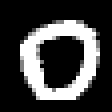

In [36]:
original_vec = x_test[5000]
original_img = 1.0 .* reshape(original_vec, (28,28))
colorview(Gray, original_img)

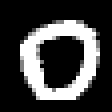

In [37]:
cut = 784
corrupted_vec = vcat(original_vec[1:cut], zeros(784-cut))
corrupted_img = 1.0 .* reshape(corrupted_vec, (28,28))
colorview(Gray, corrupted_img)

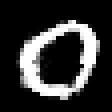

┌ Error: Error watching manifest
│   exception =
│    SystemError: opening file "/Users/pripper/.julia/packages/ArrayInterface/dX1NB/src/ArrayInterface.jl__@require__": No such file or directory
│    Stacktrace:
│     [1] systemerror(p::String, errno::Int32; extrainfo::Nothing)
│       @ Base ./error.jl:176
│     [2] #systemerror#80
│       @ ./error.jl:175 [inlined]
│     [3] systemerror
│       @ ./error.jl:175 [inlined]
│     [4] open(fname::String; lock::Bool, read::Nothing, write::Nothing, create::Nothing, truncate::Nothing, append::Nothing)
│       @ Base ./iostream.jl:293
│     [5] open
│       @ ./iostream.jl:275 [inlined]
│     [6] open(f::Base.var"#387#388"{String}, args::String; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
│       @ Base ./io.jl:382
│     [7] open
│       @ ./io.jl:381 [inlined]
│     [8] read
│       @ ./io.jl:462 [inlined]
│     [9] (::Revise.var"#41#42"{String})()
│       @ Revise ~/.julia/packages/Revise/bAgL0/src/pkgs.jl:466
└ 

In [39]:
reconstructed = QARBoM.reconstruct(rbm, round.(Int,original_vec))
reconstructed_img = 1.0 .* reshape(reconstructed, (28,28))
colorview(Gray, reconstructed_img)

In [64]:
rbm

QARBoM.RBM([-0.644878712730383 -2.0314517600597233 … -0.20789780140624423 1.0923774931552528; -0.374016904115657 0.298548978314043 … -0.7131984152543572 0.6063948330716113; … ; 0.2328611913516183 -0.5269877213921075 … 0.6899755861383681 0.6781252668528139; -1.1627185531091604 -2.2311703227376003 … 0.8564072945366772 -0.12338231697073355], [-1.2068438954294858, -1.034493266065522, -1.014668038371026, -0.6004519364459995, -0.7518556884925321, -1.0402962160987652, -0.9270410746300998, -0.9208301774588163, -0.7041272633184081, -1.0071111654037874  …  -0.6545743787129513, -0.7228061521527742, -1.0489855863672035, -0.9239041060991984, -0.8612390577063783, -1.1620978668542135, -0.9083072270101563, -0.9234904955333247, -1.1993394714943029, -0.6798883248083794], [0.10593815027436804, 2.1496756027850936, 0.06604463896709066, 9.99541427737482, -0.8064975225797423, -1.8678375044072069, 1.2178459541336937, -3.2279189160743593, -0.07123318857023057, -0.10711503466565321  …  -0.005808030496380461, 0.

In [31]:
length(5:111)

107